TP Final CoderHouse - NLP & Deep Learning  

Curso Data Science 3

Alumna : Daniela Dito

Dataset: News_Category_Dataset_v3 (Kaggle)

Consigna:

La Entrega Final constará de dos partes. Un mínimo requerido respecto a **NLP**.Deberás entregar un dataset del estilo texto (libro, paper, documento, colección de tweets, etc) donde se desarrollen de mínima dos de las tareas más usuales de preprocesamiento de NLP.

También un mínimo requerido de **Deep Learning** donde puedas construir tu primera red neuronal sencilla, lo que cubrirá la segunda actividad hacia la Entrega Final.

Para la Entrega Final deberás elegir una de las dos actividades y profundizar en el mismo, ya sea realizando un análisis de texto sobre la actividad de NLP o mejorando la red, vía adición de capas, en el de Deep Learning.

En este proyecto se aborda un flujo completo de procesamiento de lenguaje natural (NLP) y aprendizaje profundo (Deep Learning) utilizando el dataset News_Category_Dataset_v3 de Kaggle.

El objetivo principal es aplicar técnicas fundamentales de preprocesamiento de texto, exploración de datos y análisis de sentimiento, para luego construir una primera red neuronal recurrente que permita clasificar (neutras, negativas y positivas) noticias en distintas categorías y luego mejorarla.

La notebook se encuentra organizada en secciones:

**1. Librerías**: instalación e importación de las herramientas necesarias.

**2. Carga del dataset**: lectura y concatenación del dataset en un único DataFrame para su análisis.

**3. PARTE I: NLP**

*  **Análisis exploratorio (EDA)**: exploración inicial del corpus de noticias con visualizaciones y generación de insights.

*  **Preprocesamiento NLP**: limpieza del texto, tokenización, lematización y normalización de datos.
        1. NLTK
        2. SPACY

*  **Vectorización/Embbeddings**

* **Análisis de sentimiento**: estimación de la polaridad de los textos como ejemplo de tarea de NLP.

* **Regresión Logística**

**4 PARTE II: Red neuronal recurrente RNN (LSTM)**: construcción y entrenamiento de un modelo básico de clasificación de noticias, que constituye el bloque de Deep Learning requerido en la consigna.

**5 Conclusión**
---
**6 Análisis alternativo no solicitado en TP**

#1 Librerias

In [1]:
# Instalar librerias
#!pip install scipy gensim transformers torch textblob --upgrade   # Si esta opción genera incompatibilidades ir por  --force-reinstall


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.9 MB/s eta 0:00:00


In [40]:

# Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

import re
import string
import nltk
import spacy
import zipfile
from spacy import displacy
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter # Importamos Counter desde collections
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS # Importamos WordCloud y STOPWORDS
from gensim.models import Word2Vec

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer   # herramienta de scikit-learn que transforma texto en una matriz numérica (bolsa de palabras).
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader, Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

#2 Carga del Dataset

In [3]:
!gdown --id 1IiIIuJAjbAVQwW3LQCvQFxKbTvSga041
!gdown --id 1K1V-hjkwEAfJC0LnxVRyUnVabNR0_sAV

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1IiIIuJAjbAVQwW3LQCvQFxKbTvSga041
From (redirected): https://drive.google.com/uc?id=1IiIIuJAjbAVQwW3LQCvQFxKbTvSga041&confirm=t&uuid=954329d4-ffba-4e53-91ec-da7f1c49812e
To: /content/news-category-dataset.zip
100% 27.8M/27.8M [00:00<00:00, 31.7MB/s]
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1K1V-hjkwEAfJC0LnxVRyUnVabNR0_sAV
To: /content/df_sentimiento.csv
100% 18.8M/18.8M [00:00<00:00, 31.1MB/s]


In [4]:
# Ruta al archivo descargado
zip_path = "news-category-dataset.zip"

# Descomprimir en carpeta "datasets"
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall("./datasets")

# Cargar JSON en Pandas
df = pd.read_json("./datasets/News_Category_Dataset_v3.json",
                  lines= True,   # Si no se pone lines=True, pandas intentaría leer todo el archivo como un único objeto JSON, lo cual fallaría en este caso.
                  chunksize=100000)  # solo 100000 chunks

Al usar chunksize no obtengo un dataframe, sino un iterador de chunks de pandas. df no es un DataFrame, es un JsonReader, que se comporta como un generador que devuelve DataFrames de a 100.000 filas.
Cuando usamos:

* `chunksize=100000` hace que **Pandas no cargue todo el dataset de una vez**.
* En su lugar devuelve un **iterador de DataFrames** (chunks), cada uno con \~100.000 filas.
* Para este dataset se generan 3 chunks:

  * 100.000 filas
  * 100.000 filas
  * 9.527 filas

 next(df) brinda un DataFrame con 100.000 filas. **Ventaja de usar `chunksize`**: permite procesar archivos grandes **por partes**, evitando sobrecargar la memoria RAM.

In [5]:
# Convierto a Dataframe
dfs = []
for chunk in pd.read_json("./datasets/News_Category_Dataset_v3.json", lines=True, chunksize=100000):
    dfs.append(chunk)

# Unir todos los DataFrames en uno solo (Si queremos reconstruir el DataFrame completo, concatenamos los chunks)
df = pd.concat(dfs, ignore_index=True)

# Revisar
print(type(df))   # <class 'pandas.core.frame.DataFrame'>
print(df.shape)   # cantidad de filas y columnas
# Estructura del Dataset
print(f"El Dataset cuenta con {df.shape[0]} filas y {df.shape[1]} columnas.")


<class 'pandas.core.frame.DataFrame'>
(209527, 6)
El Dataset cuenta con 209527 filas y 6 columnas.


El archivo contiene **209.527 noticias** y **6 columnas** (`category`, `headline`, `authors`, `link`, `short_description`, `date`).


In [6]:
df.describe(include='all')

,link,headline,category,short_description,authors,date
count,209527,209527,209527,209527,209527,209527
unique,209486,207996,42,187022,29169,NaN
top,https://www.huffingtonpost.comhttps://www.wash...,Sunday Roundup,POLITICS,,,NaN
freq,2,90,35602,19712,37418,NaN
mean,NaN,NaN,NaN,NaN,NaN,2015-04-30 00:44:14.344308736
min,NaN,NaN,NaN,NaN,NaN,2012-01-28 00:00:00
25%,NaN,NaN,NaN,NaN,NaN,2013-08-10 00:00:00
50%,NaN,NaN,NaN,NaN,NaN,2015-03-16 00:00:00
75%,NaN,NaN,NaN,NaN,NaN,2016-11-01 00:00:00
max,NaN,NaN,NaN,NaN,NaN,2022-09-23 00:00:00


#3 PARTE I: NLP

## Análisis Exploratorio de Datos (EDA) en NLP

Para entender la naturaleza del texto antes de aplicar modelos, analizaremos:

1. **Distribución de longitudes de texto (text_length)**: muestra cuántas palabras o caracteres tienen las oraciones/documentos.

2. **Distribución de clases (target = category)**: revisar si las clases están balanceadas o si existe desbalance (clases poco representadas).

3. **Visualización de nubes de palabras WordCloud (nube de palabras)

4. **Conteo de palabras más frecuentes (word frequencies, n-grams)**: gráfico de barras con las palabras más comunes.

5. **Análisis de stopwords y rarewords.**

6. **Embeddings reducidos con PCA de las clases**

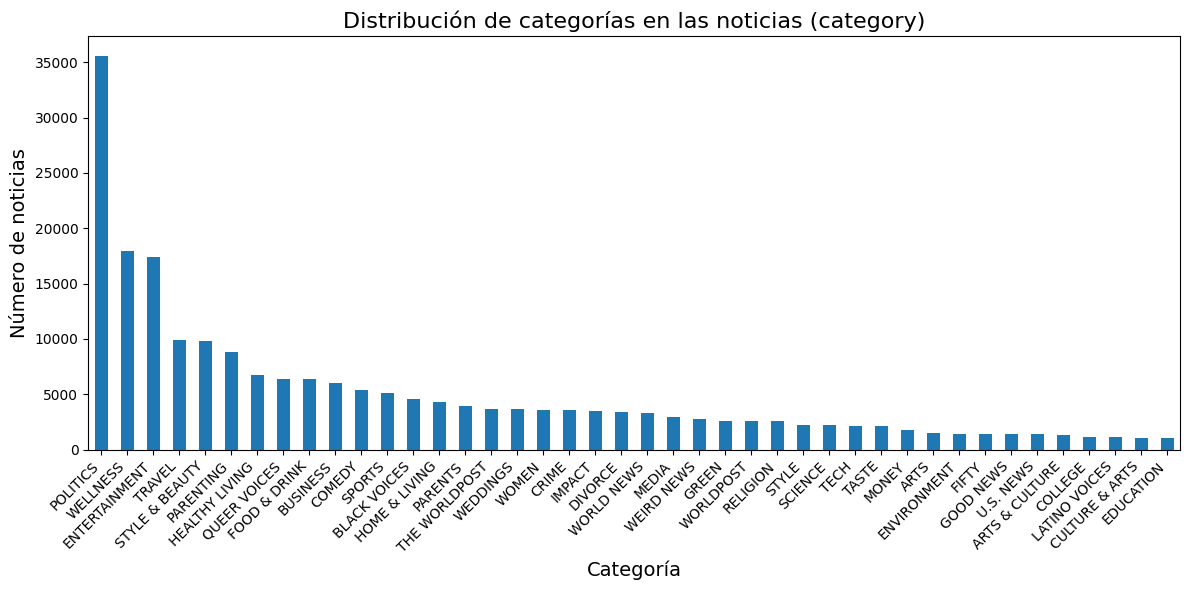

In [7]:
# Insight 1: Distribución de categorías (feature category)

plt.figure(figsize=(12,6))
ax = df['category'].value_counts().plot(kind='bar')

# Títulos usando el objeto ax
ax.set_title("Distribución de categorías en las noticias (category)", fontsize=16)
ax.set_xlabel("Categoría", fontsize=14)      # etiqueta del eje X
ax.set_ylabel("Número de noticias", fontsize=14)

# Mejoras de ticks
plt.xticks(rotation=45, ha='right', fontsize=10)

# Ajustar layout para evitar recortes
plt.tight_layout()

plt.show()


In [8]:
# Insight 1: Categoría más frecuente
print("Insight 1: La categoría más común es:", df["category"].value_counts().idxmax())

Insight 1: La categoría más común es: POLITICS


**Descripción:** El gráfico de barras muestra la distribución de noticias por categorías.

**Desbalance / asimetría a la izquierda**

Se observa que unas pocas categorías tienen muchas noticias, mientras que la mayoría tienen relativamente pocas.
**Tipo de distribución:** *distribución muy sesgada hacia la izquierda:* muchas pocas categorías con valores altos, muchas con valores bajos (“long tail”). No es simétrica, ni uniforme.



Longitud promedio de las descripciones: 19.66902594892305


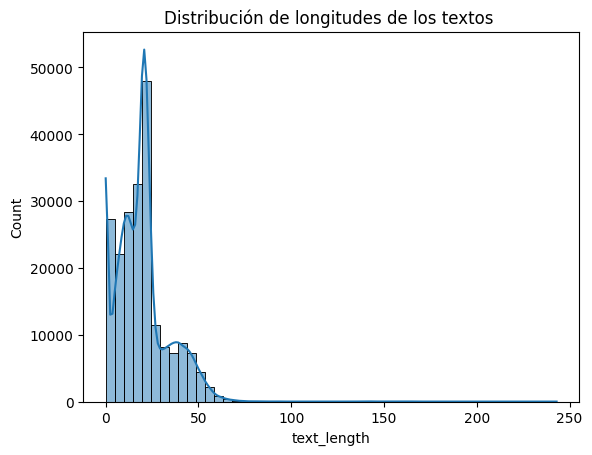

In [9]:
# Insight 2: Longitud promedio de los textos
"""
Crea una columna con la cantidad de palabras en cada texto.
Calcula la media de esas longitudes.
Grafica un histograma con densidad para visualizar la distribución.
"""
df['text_length'] = df['short_description'].apply(lambda x: len(str(x).split()))  # agrego columna text_lenght
print("Longitud promedio de las descripciones:", df['text_length'].mean())

sns.histplot(df['text_length'], bins=50, kde=True)
plt.title("Distribución de longitudes de los textos ")
plt.show()

El gráfico (**histograma con una curva de densidad** (`kde=True`)) muestra la distribución de la longitud de los textos en la columna `short_description`, donde la longitud se mide por el número de palabras.

* **Eje X (`text_length`)**: Representa el número de palabras en cada descripción. Va desde casi 0 hasta 250 palabras.
* **Eje Y (`Count`)**: Indica la frecuencia (cuántas descripciones tienen una longitud determinada).

1.  **Concentración Principal**: La mayoría de las descripciones tienen una longitud relativamente corta. El pico más alto del histograma se encuentra **alrededor de las 20 a 30 palabras**, descripciones son concisas.

2.  **Dispersión**: La mayoría de los datos se agrupan en un rango corto, probablemente entre 10 y 50 palabras. La frecuencia de descripciones más largas (más de 50 palabras) disminuye drásticamente, lo que indica que **existen muy pocas descripciones extensas**.

3.  **Valor Atípico (Outliers)**: Aunque la mayoría de los textos son cortos, el histograma muestra una "cola" larga que se extiende hasta casi 250 palabras. Esto significa que **hay algunas descripciones excepcionalmente largas**, aunque son raras.

**Conclusión del Insight**

Este análisis nos dice que la mayoría de los textos en la columna `short_description` son **breves y estandarizados**. La longitud promedio está fuertemente influenciada por la alta concentración de textos cortos.

In [10]:
 df.groupby("category")["text_length"].mean().sort_values(ascending=False).head(10)

,text_length
category,
FIFTY,33.656674
WELLNESS,30.904820
PARENTING,29.701172
EDUCATION,27.783037
MONEY,27.341686
TRAVEL,26.435657
IMPACT,26.082951
WEDDINGS,25.780728
DIVORCE,25.761529


In [11]:
# Insight 3: Categoría con descripciones más largas

# Agrupa el DataFrame por categoría
longest_cat = df.groupby("category")["text_length"].mean().idxmax() # Calcula el promedio de long. de las descripciones por c/categoría y devuelve el índice.
longest_val = df.groupby("category")["text_length"].mean().max()

# Mostrar categoría + promedio
print(f"Insight 4: La categoría con descripciones más largas es: {longest_cat}, con un promedio de palabras de {longest_val:.2f}")


Insight 4: La categoría con descripciones más largas es: FIFTY, con un promedio de palabras de 33.66


In [12]:
# Insight 4: Frecuencia de palabras.
#from wordcloud import WordCloud, STOPWORDS
#from collections import Counter              # clase Counter del módulo collections en Python.

def eda_nlp(df, text_col="short_description", target_col="category", top_n=20):
    """
    Realiza un análisis exploratorio por Wodrcloud y frecuencia de palabras en un DataFrame de texto.

    Parámetros: df : pd.DataFrame   DataFrame de entrada.
                text_col : str
    """
    #  WordCloud de todo el corpus SIN stopwords
    # -----------------------------
    text_data = " ".join(df[text_col].astype(str).tolist())
    wordcloud = WordCloud(width=800, height=400,
                          background_color="white",
                          stopwords=set(STOPWORDS),
                          max_words=100).generate(text_data)

    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("WordCloud de descripciones")
    plt.show()


    #  Frecuencia de palabras ( ANALISIS DE STOPWORDS Y RAREWORDS)
    # -----------------------------
    all_words = text_data.lower().split()
    word_freq = Counter(all_words)          # Counter es una subclase de diccionario especializada en contar objetos hasheables
    common_words = word_freq.most_common(top_n)  # definido en las 20 más frecuentes
    words, counts = zip(*common_words)
    print("Palabras raras:", word_freq.most_common()[-10:])
    print("Palabras más comunes:", common_words)

    plt.figure(figsize=(10,5))
    sns.barplot(
              x=list(counts),
              y=list(words),
              hue=list(words),    # cada palabra es un "grupo"
              palette="viridis",
              dodge=False,        # para que no se dupliquen las barras
              legend=False        # para que no aparezca una leyenda redundante
          )

    plt.title(f"Top {top_n} palabras más frecuentes")
    plt.xlabel("Frecuencia")
    plt.ylabel("Palabra")
    plt.show()

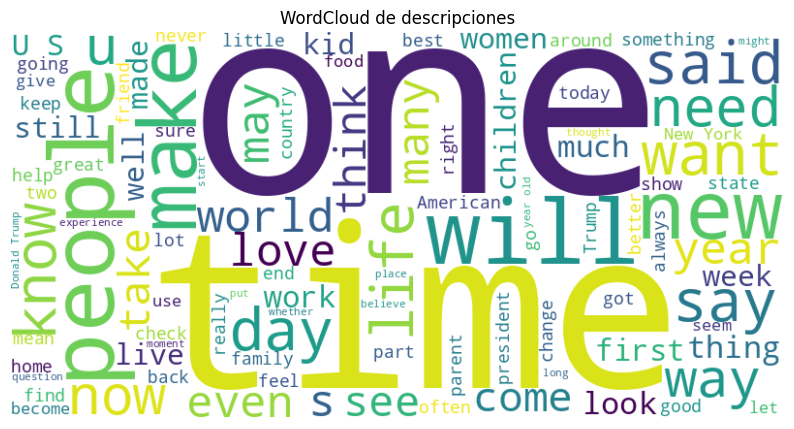

Palabras raras: [('powers-that-be', 1), ('"analysts', 1), ('"sony', 1), ('adjudged', 1), ('ellsworth', 1), ('sopa', 1), ('lte', 1), ('azarenka,', 1), ('sumyk,', 1), ('xlvi,', 1)]
Palabras más comunes: [('the', 208059), ('to', 117151), ('a', 104407), ('of', 99358), ('and', 97357), ('in', 67258), ('is', 49069), ('that', 43079), ('for', 40862), ('i', 31443), ('on', 31401), ('you', 31228), ('with', 27768), ('are', 26957), ('it', 26253), ('be', 22728), ('we', 22650), ('as', 21907), ('have', 20850), ('this', 20789)]


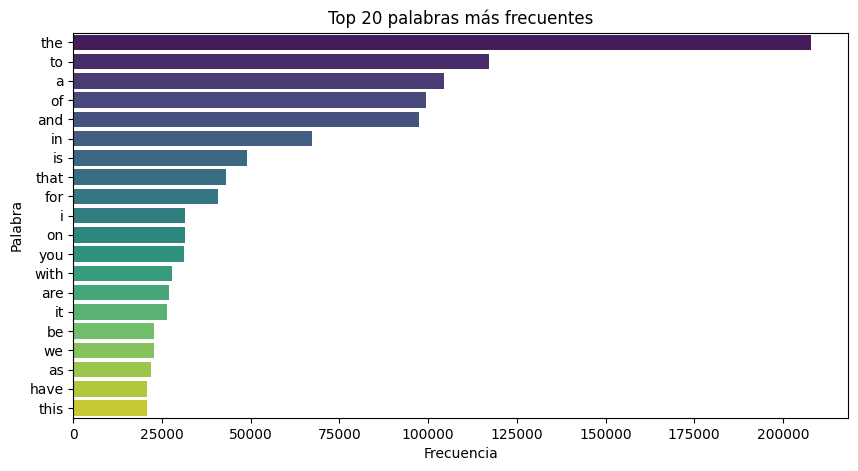

In [13]:
eda_nlp(df)

Como era esperable, muestra que las 20 palabras más comunes son palabras de parada (en inglés: stop words). Se necesita un preprocesamiento adicional. Para obtener un insight real sobre los temas o el contenido de las descripciones, se deben eliminar estas palabras de parada y quizás también la puntuación y los números.

Observamos que dentro de rarewords incluye palabras con los signos de puntuación.

## Preprocesamiento


Trabajaremos sobre una muestra de 10000 filas a los medios educativos y de capacidad de cómputo.

#### Muestra (SAMPLE)

In [14]:
# --- Samplear 10k filas ---
df_sample = df.sample(n=10_000, random_state=42)

### NLTK

A continuación utilizamos la funcion limpiar_texto basada en  bibliotecas de Python **`nltk` (Natural Language Toolkit)** y **`re` (Expresiones Regulares)**.

* **`nltk`**: Se encarga de las tareas más avanzadas de procesamiento del lenguaje natural (NLP), como la **tokenización** (dividir el texto en palabras), la eliminación de **_stopwords_** y la **lematización** (reducir las palabras a su forma base).
* **`re`**: **expresiones regulares**,para eliminar caracteres especiales y puntuación.

1.  **Convierte a minúsculas**: Transforma todo el texto a minúsculas, asegurando que, por ejemplo, "Apple" y "apple" sean tratadas como la misma palabra.
2.  **Elimina caracteres especiales**: Elimina la puntuación, símbolos y números, dejando solo letras y espacios.
3.  **Tokeniza**: Divide el texto en una lista de palabras individuales.
4.  **Lematiza y elimina _stopwords_**: Recorre cada palabra de la lista. Si la palabra no es una _stopword_ (como "a", "an", "the"), la lematiza, es decir, la reduce a su forma raíz. Por ejemplo, "running" se convierte en "run".
5.  **Une las palabras**: Finalmente, junta las palabras limpias de nuevo en una sola cadena de texto.

In [15]:
# Función para limpiar texto con regex, pasar a minúsc., tokenizar y lematizar.
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()               # lematizador de NLTK

def limpiar_texto(texto):
    # 1. Pasar a minúsculas
    texto = texto.lower()
    # 2. Eliminar caracteres especiales
    texto = re.sub(r'[^a-zA-Z\s]', '', texto)
    # 3. Eliminar etiquetas HTML
    text = re.sub(r'<.*?>', '', texto)
    # 4. Eliminar URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', texto)
    # 5. Eliminar puntuación
    # Usamos string.punctuation que contiene !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
    text = text.translate(str.maketrans('', '', string.punctuation))
    # 6. Eliminar números
    text = re.sub(r'\d+', '', texto)
    # 7. Eliminar espacios en blanco extra
    text = re.sub(r'\s+', ' ', texto).strip()

    # Tokenizar
    tokens = nltk.word_tokenize(texto)              # tokenización

    # Eliminar stopwords y lematizar ( reducir a forma canónica o lema)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words] # lista de palabras (tokens) lematizadas y sin stopwords.
    return " ".join(tokens)


In [16]:

df_sample['clean_text'] = df_sample['short_description'].astype(str).apply(limpiar_texto)       # NUeva columna con texto limpio
df_sample[['short_description', 'clean_text']].head()

,short_description,clean_text
128310,"What if, in doing so, we won't just create new...",wont create new opportunity well also uncover ...
139983,It should have been a glorious week for AOL ch...,glorious week aol chief executive tim armstron...
42339,A few protesters who refused to leave remained...,protester refused leave remained site thursday
131494,,
163649,Scientists didn't know if humans played that g...,scientist didnt know human played game well la...


NOTA: NO se realiza Stemming ( llevar la palabra a su raíz o stem ya que Lematizamos). Tanto Stemming como lematización son técnicas de normalización en el procesamiento de lenguaje natural (NLP) que se usan para reducir las palabras a una forma base. Lematización es más avanzada pero más costosa computacionalmente.


#### Nube de Palabras (Wordcloud) post limpieza

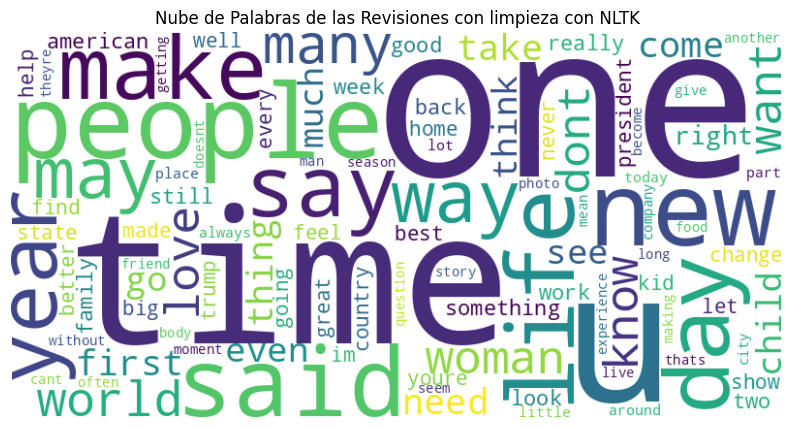

In [17]:
# Unimos todo el texto en una sola cadena
text_corpus = " ".join(review for review in df_sample['clean_text'])

# Generamos la nube de palabras
wordcloud = WordCloud(width=800, height=400,
                          background_color="white",
                          max_words=100).generate(text_corpus)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras de las Revisiones con limpieza con NLTK")
plt.show()

wordcloud.generate(text_corpus)



###Spacy

In [18]:
# Cargar el modelo de spaCy para inglés. Es más eficiente que NLTK para esta tarea
# 'en_core_web_md' es la versión mediana
try:
    nlp = spacy.load("en_core_web_md", disable=["ner", "parser"])  #  desactivamos NER y parser para que no sea computacionalmente tan costoso
except OSError:
    from spacy.cli import download
    download("en_core_web_md")
    nlp = spacy.load("en_core_web_md", disable=["ner", "parser"]) # carga el modelo pre-entrenado para inglés, incluye la lematización y la lista de stopwords en inglés.

def limpiar_doc(doc):       # Función de preprocesamiento usando SpaCy,devuelve un texto limpio o lista de tokens
    return " ".join(        # 3. Unir los tokens de nuevo en una cadena de texto
        token.lemma_.lower()  # # 2. Lematizar, convertir a minúsculas y eliminar stop words y puntuación
        for token in doc
        if not token.is_stop and not token.is_punct
    )

# Procesamiento en batch usando pipe
texts = df_sample['short_description'].astype(str).tolist()
cleaned = []

# 1. Crear un objeto Doc de SpaCy                           # nlp.pipe es la forma eficiente de spaCy de procesar varios textos en batch, en lugar de usar nlp(text) dentro de un for (más lento).
for doc in nlp.pipe(texts, batch_size=1000, n_process=-1):  # n_process=-1 usa todos los cores disponibles
    cleaned.append(limpiar_doc(doc))                        # batch_size=1000 indica cuántos textos procesa a la vez
                                                            # doc es un objeto Doc de spaCy, que contiene:tokens (doc[i]),lemas (token.lemma_),POS tags (token.pos_),dependencias sintácticas (token.dep_),entidades nombradas (doc.ents)

df_sample['clean_text_spacy'] = cleaned
#print(df_sample[['short_description', 'clean_text_spacy']].head())


In [19]:
print("\nEjemplo de preprocesamiento:")
print("Texto Original:\n", df_sample['short_description'].iloc[2])
print("\nTexto Procesado:\n", df_sample['clean_text_spacy'].iloc[2])


Ejemplo de preprocesamiento:
Texto Original:
 A few protesters who refused to leave remained at the site Thursday.

Texto Procesado:
 protester refuse leave remain site thursday


El objeto "doc" tiene menos información de la normalización completa de spaCy, porque deshabilitamos algunas partes del pipeline:

NER (ner) → doc.ents estará vacío, no hay entidades reconocidas.

Parser (parser) → dependencias sintácticas y árbol de frases (token.dep_, token.head) no estarán disponibles.

* Pipeline activo: Tokenización - Lemmatización - POS tagging

## Análisis de Sentimiento: Limpieza con NLTK + TextBlob

Como este dataset no tiene etiquetas de sentimiento, solo categorías temáticas (como POLITICS, ENTERTAINMENT, etc.), para aplicar análisis de sentimiento usamos directamente un analizador pre-entrenado como TextBlob.

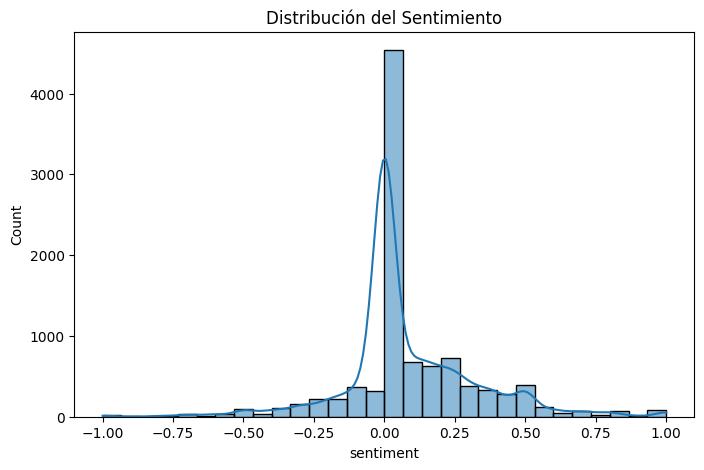

                                        short_description  sentiment
128310  What if, in doing so, we won't just create new...   0.136364
139983  It should have been a glorious week for AOL ch...   0.000000
42339   A few protesters who refused to leave remained...   0.000000
131494                                                      0.000000
163649  Scientists didn't know if humans played that g...  -0.080000


In [20]:
#TextBlob es una librería de Python de alto nivel que simplifica las tareas comunes del Procesamiento del Lenguaje Natural (NLP).
# Análisis de Sentimiento: Determina si una pieza de texto es positiva, negativa o neutral, asignando un valor de polaridad y subjetividad.

def obtener_sentimiento(texto):
    return TextBlob(texto).sentiment.polarity               # TEXTBLOB-->Polaridad: 1 Positiva, -1 Negativa
                                                            # Subjetividad: "0"( objetivo,un hecho), "1" (subjetivo, una opinion)

df_sample['sentiment'] = df_sample['clean_text'].apply(obtener_sentimiento)    # método .apply() de pandas para aplicar la función obtener_sentimiento a c/fila de la columna 'clean_text'. El resultado (la polaridad de cada texto) se guarda en una nueva columna llamada 'sentiment'.

plt.figure(figsize=(8,5))
sns.histplot(df_sample['sentiment'], bins=30, kde=True)
plt.title("Distribución del Sentimiento")
plt.show()

print(df_sample[['short_description', 'sentiment']].head())

El eje X representa la **polaridad del sentimiento** (de -1.0 a 1.0) y el eje Y, el recuento o la frecuencia de los textos que caen en ese rango.

Predominio de la neutralidad: La característica más notable es el pico central extremadamente alto. Esto indica que una gran mayoría de los textos analizados tienen una polaridad de sentimiento cercana a cero (0.0), su tono es neutral. Esto es común en textos que son puramente informativos o que no expresan una opinión fuerte.

Sesgo positivo: Aunque la neutralidad domina, la distribución de los textos positivos (valores a la derecha del 0) es más amplia y tiene una frecuencia mayor que la de los textos negativos. Hay una "cola" más larga y una mayor cantidad de barras en el rango de 0.25 a 0.75, lo que sugiere que hay más textos con un sentimiento moderadamente positivo que textos con un sentimiento moderadamente negativo.

Baja cantidad de textos extremos: Tanto los sentimientos extremadamente positivos (cerca de 1.0) como los extremadamente negativos (cerca de -1.0) son muy poco frecuentes. Las barras en los extremos del gráfico son muy bajas, lo que indica que pocos textos expresan un sentimiento muy fuerte.

En resumen, el gráfico revela que la mayoría de los textos no expresan un sentimiento claro. De aquellos que sí lo hacen, hay un ligero predominio de opiniones positivas sobre las negativas, aunque las opiniones muy fuertes son raras.


--- Conteo de Categorías de Sentimiento ---
Polarity
Neutro      5576
Positivo    3377
Negativo    1047
Name: count, dtype: int64


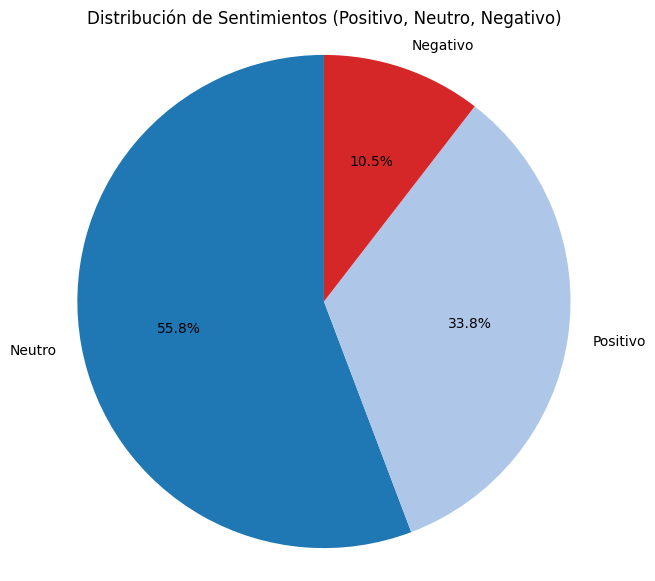


--- Vista previa del DataFrame mejorado ---
                                        short_description  sentiment  Polarity
128310  What if, in doing so, we won't just create new...   0.136364  Positivo
139983  It should have been a glorious week for AOL ch...   0.000000    Neutro
42339   A few protesters who refused to leave remained...   0.000000    Neutro
131494                                                      0.000000    Neutro
163649  Scientists didn't know if humans played that g...  -0.080000    Neutro


In [21]:
#  Crear la columna 'Polarity' con categorías
def clasificar_polaridad(score):
    """
    Clasifica un puntaje de polaridad en 'Positivo', 'Neutro' o 'Negativo'.
    """
    if score > 0.1:
        return 'Positivo'
    elif score < -0.1:
        return 'Negativo'
    else:
        return 'Neutro'

df_sample['Polarity'] = df_sample['sentiment'].apply(clasificar_polaridad)

#  Conteo de valores de la nueva columna 'Polarity' ---
print("\n--- Conteo de Categorías de Sentimiento ---")
print(df_sample['Polarity'].value_counts())

# Visualización con un gráfico de torta ---
polarity_counts = df_sample['Polarity'].value_counts()            # Obtener los conteos para el gráfico
labels = polarity_counts.index
sizes = polarity_counts.values

# Crear el gráfico de torta
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#1F77B4', '#AEC7E8', '#D62728'])
plt.title("Distribución de Sentimientos (Positivo, Neutro, Negativo)")
plt.axis('equal')  # Asegura que el círculo sea perfecto
plt.show()

# Mostrar las primeras filas con las nuevas columnas ---
print("\n--- Vista previa del DataFrame mejorado ---")
print(df_sample[['short_description', 'sentiment', 'Polarity']].head())

* **Predominio de la neutralidad:** El hallazgo más significativo es que la mayoría de los textos (el **55.6%**) tiene un sentimiento **neutro**. Esto es común en textos informativos, descripciones o datos sin una carga emocional.

* **Sentimiento positivo en segundo lugar:** La segunda categoría más grande es el sentimiento **positivo**, que representa un **33.4%**.


## Análisis de Sentimiento: Limpieza con SPACY + WordEmbbeddings

Word Embeddings: Algoritmo de Vectorización (Vectores de SpaCy)

Se utiliza Word2Vec para crear embeddings, que es una técnica de vanguardia superior a los modelos de bolsa de palabras simples (como CountVectorizer o TF-IDF) para capturar el contexto semántico del lenguaje. Es decir, a diferencia de los métodos tradicionales, que crean vectores dispersos basados en la frecuencia de las palabras, los Word Embeddings (incrustaciones de palabras) generan vectores densos de baja dimensión que capturan el significado semántico y las relaciones contextuales entre las palabras. .

In [22]:
## Vectorización: Convertimos tokens a Vectores.
# Ahora, como ya hemos limpiado los textos, usaremos esta columna clean_text_spacy en lugar de la columna original.
import numpy as np

# Tokenizar el texto limpio (ya hemos hecho un paso de tokenización con spaCy)
df_sample['tokenized_clean_text'] = df_sample['clean_text_spacy'].apply(lambda x: x.split())

# Entrenar el modelo Word2Vec
model_w2v = Word2Vec(df_sample['tokenized_clean_text'],   # Para vectorizar: Word2Vec técnica de embeddings
                     vector_size=100,              # vector inicial en ceros, tamaño 100 (dim de Word2Vec)
                     window=5,
                     min_count=1,
                     workers=4)

# 1. Vectorizar el texto usando Word Embeddings: Convertir cada texto en un vector promediado   # Atención: PROMEDIADO
def vectorize_text(tokens, model):
    vec = np.zeros(100)  # 100 es el tamaño del vector
    count = 0
    for word in tokens:             # chequea que la palabra tenga embedding
        if word in model.wv:        #  vectorizar: Word2Vec técnica de embeddings (evisa si la palabra existe en el vocabulario del modelo Word2Vec.)
            vec += model.wv[word]
            count += 1
    return vec / count if count > 0 else vec # hace un promedio de embeddings → obtiene un vector único que resume todo el texto como el “centro” de los embeddings de sus palabras.

# Aplicar la vectorización con el modelo entrenado
df_sample['vectorized_text'] = df_sample['tokenized_clean_text'].apply(lambda x: vectorize_text(x, model_w2v))

La función hace un **promedio de embeddings de Word2Vec** para representar el texto completo como un vector de tamaño fijo (100 dimensiones), para representar todo un texto en un único vector numérico.

return vec / count --> es un **promedio**

Porque:

$$
\text{vec\_final} = \frac{\sum_{i=1}^n \text{embedding}(word_i)}{n}
$$

Esto es literalmente el **mean pooling** (promediar los embeddings).

Ventajas: Funciona como baseline para representar textos.

Limitaciones:

* Pierde el **orden de las palabras**.
* Todos los tokens pesan lo mismo (no distingue palabras más importantes).
* No capta relaciones sintácticas ni contextuales (para eso se usan modelos como BERT).


## Regresión Logistica

**Clasificación Multiclase con Regresión Logística**
En tareas de clasificación de texto, como el Análisis de Sentimientos (Positivo, Negativo, Neutro), a menudo necesitamos predecir más de dos categorías.

Aunque la Regresión Logística (Reg Log) es inherentemente un clasificador binario, es una herramienta poderosa y eficiente que se adapta a problemas multiclase a través de:

Regresión Logística Multinomial (Softmax): Este enfoque utiliza la función Softmax, que generaliza la función sigmoide y produce un vector de probabilidades para todas las clases, asegurando que sumen 1.

### REG. LOG. + Análisis de sentimiento con transformers Hugging Face BERT

Usaremos un modelo de 🤗 Hugging Face Transformers, específicamente uno ya entrenado para análisis de sentimiento: (No requiere entrenamiento, solo inferencia)

* Modelo: cardiffnlp/twitter-roberta-base-sentiment

* Etiquetas: 'negative', 'neutral', 'positive'


Pasos:

✔️ PASO 1 :1.1 modelo BERT para etiquetar automáticamente el dataset con sentimientos
            1.2 Vectorizar

✔️ PASO 2: Entrenar un modelo supervisado (Regresión Logística) con esas etiquetas


RECORDAR--> SAMPLE: Por limitaciones de cómputo, se utilizó una muestra representativa del dataset

In [23]:
# PASO 1.1 : Modelo preentrenado de análisis de sentimiento BERT
model_name = "cardiffnlp/twitter-roberta-base-sentiment"

# Cargar tokenizer y modelo
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Crear pipeline de sentimiento
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cpu


In [24]:
# # DEJAR COMENTADA PORQUE EL TIEMPO DE EJECUCIÓN ES ALTO, directamente cargar en celda siguiente DF_SAMPLE GUARDADO

# # Elegimos columna de texto "short_description"
# """Nota: No limpiar con spaCy antes de pasar a BERT → BERT necesita el contexto original.
# Modelos como cardiffnlp/twitter-roberta-base-sentiment fueron entrenados con texto natural, no con texto lematizado, ni sin stopwords, ni sin mayúsculas.
# BERT necesita contexto completo, incluyendo stopwords y estructura gramatical, por ende no usar columnas ya limpias como df_sample[['clean_text_spacy']
# """
# from tqdm import tqdm     # bARRA DE PROGRESO Cada iteración procesa batch_size textos con BERT, y la barra de progreso avanza.

# # Asegurar GPU si está disponible  # --- Configurar pipeline ---
# sentiment_pipeline = pipeline(
#     "sentiment-analysis",
#     model=model,
#     tokenizer=tokenizer,
#     device=0 if torch.cuda.is_available() else -1       # usar la GPU de Colab
# )

# # Procesar en lotes
# batch_size = 32    # Se procesa de a 32 textos por vez en vez de 1
# texts = df_sample['short_description'].astype(str).tolist()
# #texts = df['short_description'].astype(str).tolist()  # NO trabajaremos con todo el texto sino con una muestra (df_sample=10k)
# labels = []

# # tqdm envuelve el rango para mostrar progreso
# for i in tqdm(range(0, len(texts), batch_size), desc="Procesando textos"):
#     batch = texts[i:i+batch_size]
#     outputs = sentiment_pipeline(batch)
#     labels.extend([out['label'] for out in outputs])

# # --- Guardar resultados en el sample ---
# df_sample['sentimiento_bert'] = labels                                # muestra 10k
#  # devulve LABEL_0, LABEL1_ LABEL_2  # todo el texto


In [25]:
# labels = {0: "NEGATIVE", 1: "NEUTRAL", 2: "POSITIVE"}

# def map_sentiment_label(raw_label):
#     return labels[int(raw_label.split("_")[1])]

# df_sample['sentimiento_bert_mapeo'] = [map_sentiment_label(x['label']) for x in sentiment_pipeline(df_sample['short_description'].tolist())]


In [42]:
# Guardar el DataFrame con los resultados
#df_sample.to_csv("df_sentimiento.csv", index=False)    # Guardar CSV

# Para cargarlo luego
df_sample = pd.read_csv("df_sentimiento.csv")


In [43]:
# Resultados
print(df_sample['sentimiento_bert'].value_counts())

sentimiento_bert
LABEL_1    5258
LABEL_2    2386
LABEL_0    2356
Name: count, dtype: int64


Observamos que predominan los Label_1, es decir los sentimientos Neutrales.

Ahora que ya aplicamos BERT para etiquetar sentimientos, podemos entrenar un modelo predictivo, como Regresión Logística, usando esas etiquetas como y.

pipeline:

*  PASO 1.1 Genera etiquetas con BERT (sentimiento_bert → sentimiento_encoded)

* PASO 1.2 Usa Word2Vec para vectorizar (vectorized_text).

* PASO 2 Entrena regresión logística con esas etiquetas.

In [44]:
#  1. Crear el codificador de etiquetas
le = LabelEncoder()          # Crea un objeto LabelEncoder de scikit-learn, para convertir etiquetas de texto (strings) en números,

# 2. Transformar las etiquetas de texto a números
df_sample['sentimiento_encoded'] = le.fit_transform(df_sample['sentimiento_bert'])

# 3. Extraer los valores como array de NumPy
y_hf = df_sample['sentimiento_encoded'].values      # Extrae los valores de la columna codificada como un array de NumPy, para usarlo como variable objetivo (y) en modelos de Machine Learning o Deep Learning.


In [45]:
print(le.classes_)  # ejemplo: ['NEGATIVE', 'NEUTRAL', 'POSITIVE']


['LABEL_0' 'LABEL_1' 'LABEL_2']


In [46]:
# PASO 1.2 VECTORIZAR CON WORD2VEC
df_sample['vectorized_text'] = df_sample['tokenized_clean_text'].apply(lambda x: vectorize_text(x, model_w2v))

# Convert the string representation of lists to actual lists of floats
df_sample['vectorized_text'] = df_sample['vectorized_text'].apply(lambda x: eval(x.replace(' ', ',')) if isinstance(x, str) else x)

X_hf= np.array(df_sample['vectorized_text'].tolist())
y_hf = df_sample['sentimiento_encoded'].values

# Conj de entrenamiento y testeo ( Split + entrenamiento)
X_train_hf, X_test_hf, y_train_hf, y_test_hf = train_test_split(X_hf,
                                                                y_hf,
                                                                test_size=0.2,
                                                                random_state=42,
                                                                stratify=y_hf  # <-- mantiene proporción de clases ante desbalanceo
)

# PASO 2  Entrenar un modelo supervisado (Regresión Logística) con esas etiquetas
# Mode. de Reg. Log con ponderación automática de clases
model_hf = LogisticRegression(max_iter=1000,
                              class_weight="balanced",
                              random_state=42) # esto hace que los errores en NEGATIVE y POSITIVE (minoría) cuenten más que los errores en NEUTRAL.
model_hf.fit(X_train_hf, y_train_hf)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [47]:
# evaluar modelo
y_pred_hf = model_hf.predict(X_test_hf)
print(" Reg. Logistica con Análisis de sentimiento con Bert")
print(classification_report(y_test_hf, y_pred_hf, target_names=le.classes_))

 Reg. Logistica con Análisis de sentimiento con Bert
              precision    recall  f1-score   support

     LABEL_0       0.28      0.54      0.37       471
     LABEL_1       0.65      0.42      0.51      1052
     LABEL_2       0.31      0.28      0.30       477

    accuracy                           0.41      2000
   macro avg       0.42      0.41      0.39      2000
weighted avg       0.49      0.41      0.43      2000



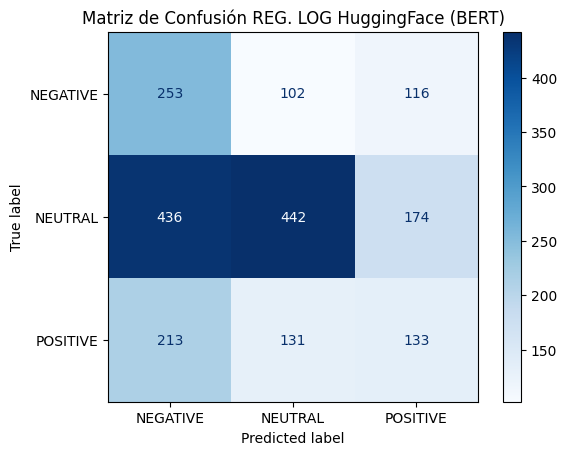

In [48]:
# Matriz de confusión

cm_hf = confusion_matrix(y_test_hf, y_pred_hf, labels=[0,1,2])

disp = ConfusionMatrixDisplay(confusion_matrix=cm_hf,
                              display_labels=["NEGATIVE", "NEUTRAL", "POSITIVE"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de Confusión REG. LOG HuggingFace (BERT)")
plt.show()


 Interpretación de la matriz de confusión

* **NEGATIVE (fila superior, soporte 471):**

  * Correctamente clasificados: **253**
  * Predichos como NEUTRAL: 102
  * Predichos como POSITIVE: 116
    🔎 El modelo captura bastante bien los negativos, pero los confunde en proporciones similares con neutrales y positivos → de ahí la **precisión baja (0.28)** pero el **recall alto (0.54)**.

* **NEUTRAL (fila del medio, soporte 1052):**

  * Correctamente clasificados: **442**
  * Mal clasificados como NEGATIVE: 436 (!), casi la mitad
  * Mal clasificados como POSITIVE: 174
     Se nota que **la clase NEUTRAL se mezcla mucho con NEGATIVE**. Esto explica por qué su precision es razonable (0.65, cuando acierta lo hace bien) pero el recall queda bajo (0.42).

* **POSITIVE (fila inferior, soporte 477):**

  * Correctamente clasificados: **133**
  * Mal clasificados como NEGATIVE: 213
  * Mal clasificados como NEUTRAL: 131
    🔎 El modelo **no logra distinguir bien los positivos**, ya que más de 70% se confunden con otras clases → por eso el recall (0.28) y la precisión (0.31) son bajos.

* El modelo **tiende a sobrerrepresentar la clase NEGATIVE** en sus predicciones.
* La clase **NEUTRAL domina**, y aunque es la más numerosa, la mitad de sus instancias se confunden con NEGATIVE.
* La clase **POSITIVE es la más problemática**, con el peor equilibrio entre recall y precision.

Esto refleja dos cosas:

1. **Desbalance de clases** (NEUTRAL es mayoría).
2. **Limitaciones de un modelo lineal** (Reg. Logística) para separar representaciones BERT de tres sentimientos.



#### Reducción de dimencionalidad con PCA

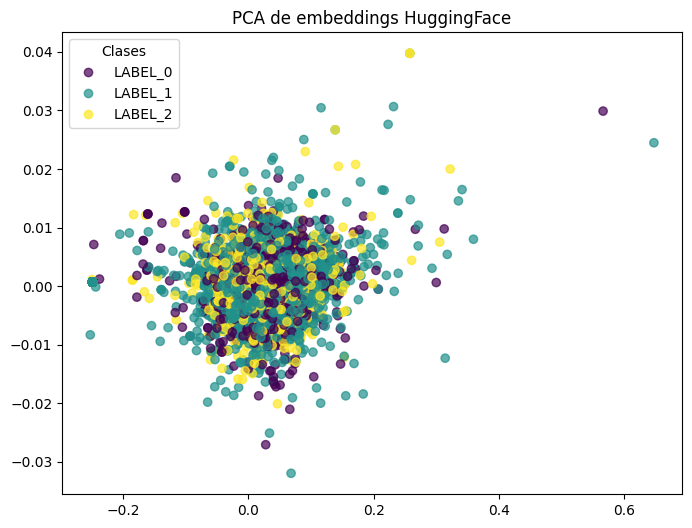

In [49]:
# PCA
pca = PCA(n_components=2)         # PCA(n_components=2) reduce tus vectores de alta dimensión (p. ej. 768 para BERT) a 2 dimensiones para poder graficarlas.
X_pca = pca.fit_transform(X_hf)   # X_hf son los embeddings de HuggingFace

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y_hf, cmap="viridis", alpha=0.7)


# Obtenemos handles y labels del scatter
handles, _ = scatter.legend_elements()

# Creamos la leyenda usando los labels que quieras

plt.legend(handles, le.classes_, title="Clases")
# plt.legend(handles=scatter.legend_elements()[0], labels=le.classes_)
plt.title("PCA de embeddings HuggingFace")
plt.show()


Cada punto es un texto.

El color (c=y_hf) representa la clase (NEGATIVE, NEUTRAL, POSITIVE).

Este gráfico sugiere que los embeddings de BERT capturan información semántica útil, pero no se proyectan en un 2D lineal con separaciones claras entre sentimientos. La mezcla que se ve aquí es consistente con la confusión entre clases vista en la matriz de confusión.


In [51]:
# pca.explained_variance_ratio_ → porcentaje de varianza que captura cada componente.
print(pca.explained_variance_ratio_)


[0.98721284 0.00191768]


Los dos primeros componentes principales explican aproximadamente el 98.997% de la varianza total de los datos.

Cálculo detallado:

$0.98821981$

$0.0017486$

Suma = $0.98996841$

Porcentaje = $98.996841%$



#4 Parte II: Deep Learning con PyTorch RNN

##Modelo RNN con PyTorch

* Embeddings promedio de BERT por texto -->(vectorized_text)

* Etiquetas codificadas --> (sentimiento_encoded)

* Una RNN simple o LSTM de 1 capa

* Softmax para clasificación multiclase

(Deep Learning, Red Neuronal Recurrente (RNN), Long Short-Term Memory (LSTM), Capa de Embedding, Optimizador Adam, Pérdida de Entropía Cruzada Categórica.)

In [52]:
# RNN básica entrenada sobre embeddings de BERT para 3 clases
# Paso 1: Preparar datos

# ya tenemos los embeddings
# X_hf = np.array(df_sample['vectorized_text'].tolist())
# y_hf = df_sample['sentimiento_encoded'].values

# X_train_hf, X_test_hf, y_train_hf, y_test_hf = train_test_split(
#     X_hf, y_hf, test_size=0.2, random_state=42
# )

# Convertimos a tensores
X_train_tensor = torch.tensor(X_train_hf, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_hf, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_hf, dtype=torch.long)
y_test_tensor = torch.tensor(y_test_hf, dtype=torch.long)

# Creamos DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)


In [53]:
# PAso 2: Definir una RNN simple (LSTM)
#Como los embeddings ya son vectores fijos por texto, podemos usar un LSTM de 1 capa que reciba esos vectores:

class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # x: (batch_size, seq_len, input_size)
        # embeddings son vectores por documento (no secuencias), hacemos seq_len=1
        x = x.unsqueeze(1)           # (batch_size, 1, input_size)
        out, (hn, cn) = self.lstm(x)
        out = out[:, -1, :]           # Tomamos la última salida
        out = self.fc(out)
        return out

input_size = X_train_hf.shape[1]       # dimensión de los embeddings
hidden_size = 64
num_classes = 3

model_RNN_simple = SimpleRNN(input_size, hidden_size, num_classes)


In [54]:
# instancias por clases
print(df_sample['sentimiento_bert'].value_counts())

sentimiento_bert
LABEL_1    5258
LABEL_2    2386
LABEL_0    2356
Name: count, dtype: int64


In [55]:
# Paso 3: Entrenamiento

# 1 Definir el dispositivo (CPU o GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # GPU si está disponible, sino CPU
model_RNN_simple.to(device)  # mover modelo al dispositivo correcto

# 2 Contar instancias por clase y hardcodeado lo detallamos: # NEGATIVE=2356, NEUTRAL=5258, POSITIVE=2386
class_counts = torch.tensor([2356, 5258, 2386], dtype=torch.float32)  # float32 porque CrossEntropyLoss requiere float

# 3 Calcular pesos inversamente proporcionales a la frecuencia
class_weights = 1.0 / class_counts                   # pesos inversos: clase rara → mayor peso
class_weights = class_weights / class_weights.sum()  # normalizar para que sumen 1
class_weights = class_weights.to(device)             # mover los pesos al mismo dispositivo que el modelo

# 4 Definir la función de pérdida con ponderación
criterion = nn.CrossEntropyLoss(weight=class_weights)  # CrossEntropyLoss usa estos pesos para penalizar más las clases minoritarias

# 5 Definir el optimizador
optimizer = optim.Adam(model_RNN_simple.parameters(), lr=1e-3)  # Adam es un optimizador común para RNNs

# 6 Entrenamiento del modelo
num_epochs = 10
for epoch in range(num_epochs):
    model_RNN_simple.train()  # poner el modelo en modo entrenamiento
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        # Mover los datos al mismo dispositivo que el modelo
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()  # limpiar gradientes del paso anterior
        outputs = model_RNN_simple(X_batch)  # forward pass
        loss = criterion(outputs, y_batch)  # calcular la pérdida
        loss.backward()  # backward pass: calcular gradientes
        optimizer.step()  # actualizar los pesos del modelo

        running_loss += loss.item()  # acumular pérdida para estadísticas

    # Imprimir la pérdida promedio por epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1/10, Loss: 1.0933
Epoch 2/10, Loss: 1.0675
Epoch 3/10, Loss: 1.0518
Epoch 4/10, Loss: 1.0458
Epoch 5/10, Loss: 1.0415
Epoch 6/10, Loss: 1.0387
Epoch 7/10, Loss: 1.0374
Epoch 8/10, Loss: 1.0359
Epoch 9/10, Loss: 1.0353
Epoch 10/10, Loss: 1.0348


In [56]:
#Paso4 : evaluación simple

model_RNN_simple.eval()
y_pred_rnn_simple = []
y_true_rnn_simple = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model_RNN_simple(X_batch)
        preds = torch.argmax(outputs, dim=1)
        y_pred_rnn_simple.extend(preds.numpy())
        y_true_rnn_simple.extend(y_batch.numpy())

acc = accuracy_score(y_true_rnn_simple, y_pred_rnn_simple)
print(f"Test Accuracy: {acc:.4f}")
print("\nClassification Report:\n", classification_report(y_true_rnn_simple, y_pred_rnn_simple, target_names=le.classes_))

Test Accuracy: 0.3650

Classification Report:
               precision    recall  f1-score   support

     LABEL_0       0.28      0.56      0.38       471
     LABEL_1       0.94      0.21      0.34      1052
     LABEL_2       0.30      0.51      0.38       477

    accuracy                           0.36      2000
   macro avg       0.50      0.43      0.36      2000
weighted avg       0.63      0.36      0.36      2000



##Modelo RNN con PyTorch mejorada

Mayor capacidad gracias a 2 capas LSTM y más neuronas (hidden_size=128). Dropout reduce overfitting. Bidireccional ayuda a capturar dependencias de contexto de la secuencia. Scheduler ajusta la tasa de aprendizaje a medida que el modelo converge.

In [57]:
# Mdelo mejorado

class ImprovedRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, num_layers=2, dropout=0.3, bidirectional=True):
        super(ImprovedRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.bidirectional = bidirectional

        # LSTM con múltiples capas, bidireccional y dropout entre capas
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0.0,
            bidirectional=bidirectional
        )

        factor = 2 if bidirectional else 1
        self.fc = nn.Linear(hidden_size * factor, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = x.unsqueeze(1)  # Si los embeddings son vectores fijos, seq_len=1
        out, (hn, cn) = self.lstm(x)
        out = out[:, -1, :]  # Última salida
        out = self.dropout(out)
        out = self.fc(out)
        return out


In [58]:
#Inicializar modelo y optimizador
input_size = X_train_hf.shape[1]  # Dimensión de los embeddings
hidden_size = 128
num_classes = 3
num_layers = 2
dropout = 0.3
bidirectional = True

model_rnn_mejorada = ImprovedRNN(input_size, hidden_size, num_classes, num_layers, dropout, bidirectional)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_rnn_mejorada.parameters(), lr=1e-3)

# Scheduler para ajustar la tasa de aprendizaje
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)


In [59]:
#Entrenamamiento
num_epochs = 10

for epoch in range(num_epochs):
    model_rnn_mejorada.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model_rnn_mejorada(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    scheduler.step()  # Ajusta la tasa de aprendizaje
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, LR: {scheduler.get_last_lr()[0]:.6f}")


Epoch 1/10, Loss: 0.9998, LR: 0.001000
Epoch 2/10, Loss: 0.9689, LR: 0.001000
Epoch 3/10, Loss: 0.9619, LR: 0.001000
Epoch 4/10, Loss: 0.9602, LR: 0.001000
Epoch 5/10, Loss: 0.9600, LR: 0.000500
Epoch 6/10, Loss: 0.9594, LR: 0.000500
Epoch 7/10, Loss: 0.9596, LR: 0.000500
Epoch 8/10, Loss: 0.9595, LR: 0.000500
Epoch 9/10, Loss: 0.9595, LR: 0.000500
Epoch 10/10, Loss: 0.9595, LR: 0.000250


In [60]:
#Evaluación
model_rnn_mejorada.eval()
y_pred_rnn_mejorada = []
y_true_rnn_mejorada = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model_rnn_mejorada(X_batch)
        preds = torch.argmax(outputs, dim=1)
        y_pred_rnn_mejorada.extend(preds.numpy())
        y_true_rnn_mejorada.extend(y_batch.numpy())

acc = accuracy_score(y_true_rnn_mejorada, y_pred_rnn_mejorada)
print(f"Test Accuracy: {acc:.4f}")
print(classification_report(y_true_rnn_mejorada, y_pred_rnn_mejorada, zero_division=0))


Test Accuracy: 0.5260
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       471
           1       0.53      1.00      0.69      1052
           2       0.00      0.00      0.00       477

    accuracy                           0.53      2000
   macro avg       0.18      0.33      0.23      2000
weighted avg       0.28      0.53      0.36      2000



In [61]:
# Guarda el modelo completo (estructura + pesos)
torch.save(model_rnn_mejorada, "model_rnn_mejorada.pth")
torch.save(model_RNN_simple, "model_rnn_simple.pth")


#5 Comparación de modelos y conclusiones

In [62]:
# Función para calcular métricas weighted (average="weighted" es el promedio ponderado, lo utilizamos por el DESBALANCEO de clases)
def get_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision (weighted)": precision_score(y_true, y_pred, average="weighted", zero_division=0), # En clasificación multiclase, average="weighted" calcula la precisión para cada clase y hace un promedio ponderado según el número de instancias de cada clase.
        "Recall (weighted)": recall_score(y_true, y_pred, average="weighted", zero_division=0),
        "F1-score (weighted)": f1_score(y_true, y_pred, average="weighted", zero_division=0)
    }

# Calculamos métricas de cada modelo
metrics_logreg = get_metrics(y_test_hf, y_pred_hf)
metrics_rnn_simple = get_metrics(y_true_rnn_simple, y_pred_rnn_simple)
metrics_rnn_mejorada = get_metrics(y_true_rnn_mejorada, y_pred_rnn_mejorada)

# Creamos el DataFrame comparativo y redondeamos a 2 decimales
df_comparacion = pd.DataFrame({
    "Modelo": [
        "Logistic Regression (BERT)",
        "RNN simple (1 capa LSTM)",
        "RNN mejorada (2 capas + dropout)"
    ],
    "Accuracy": [
        round(metrics_logreg["Accuracy"], 2),
        round(metrics_rnn_simple["Accuracy"], 2),
        round(metrics_rnn_mejorada["Accuracy"], 2)
    ],
    "Precision (weighted)": [
        round(metrics_logreg["Precision (weighted)"], 2),      # También usa el promedio ponderado por el número de instancias de cada clase.
        round(metrics_rnn_simple["Precision (weighted)"], 2),
        round(metrics_rnn_mejorada["Precision (weighted)"], 2)
    ],
    "Recall (weighted)": [
        round(metrics_logreg["Recall (weighted)"], 2),        # También usa el promedio ponderado
        round(metrics_rnn_simple["Recall (weighted)"], 2),
        round(metrics_rnn_mejorada["Recall (weighted)"], 2)
    ],
    "F1-score (weighted)": [
        round(metrics_logreg["F1-score (weighted)"], 2),     # También usa el promedio ponderado
        round(metrics_rnn_simple["F1-score (weighted)"], 2),
        round(metrics_rnn_mejorada["F1-score (weighted)"], 2)
    ],
    "Observaciones": [
        "Baseline lineal; rendimiento más bajo",
        "Primera RNN básica; mejora sobre baseline",
        "RNN mejorada; más capacidad y regularización, ligera mejora"
    ]
})

# Mostramos el cuadro comparativo
print("Comparación de modelos y métricas obtenidas:\n")
display(df_comparacion)



Comparación de modelos y métricas obtenidas:



,Modelo,Accuracy,Precision (weighted),Recall (weighted),F1-score (weighted),Observaciones
0,Logistic Regression (BERT),0.41,0.49,0.41,0.43,Baseline lineal; rendimiento más bajo
1,RNN simple (1 capa LSTM),0.36,0.63,0.36,0.36,Primera RNN básica; mejora sobre baseline
2,RNN mejorada (2 capas + dropout),0.53,0.28,0.53,0.36,"RNN mejorada; más capacidad y regularización, ..."


OBSERVACIONES:

1. zero_division=0  para solucionar problema de **warnings** que reflejan que los modelos no logran predecir todas las clases → principalmente por **desbalanceo** y **tamaño limitado de la muestra**, **algunas clases del dataset de validación nunca fueron predichas por el modelo**.  
- Esto es común en problemas de **clasificación desbalanceada** o cuando se trabaja con una **muestra reducida** (en este caso, 10k textos). Si el dataset es chico, es más probable que ciertas clases tengan muy pocos ejemplos en el `test set`, y los modelos no lleguen a capturarlas.

3. El parámetro average="weighted" en precision_score, recall_score y f1_score asegura que las métricas finales representen correctamente la importancia relativa de cada clase en un problema multiclase desbalanceado.
3. Esto sugiere que:
   - El **espacio de embeddings** es informativo, pero no suficiente para separar claramente todas las clases en esta muestra.  
   - Un **dataset más grande y balanceado** podría mejorar las métricas y reducir los warnings.  


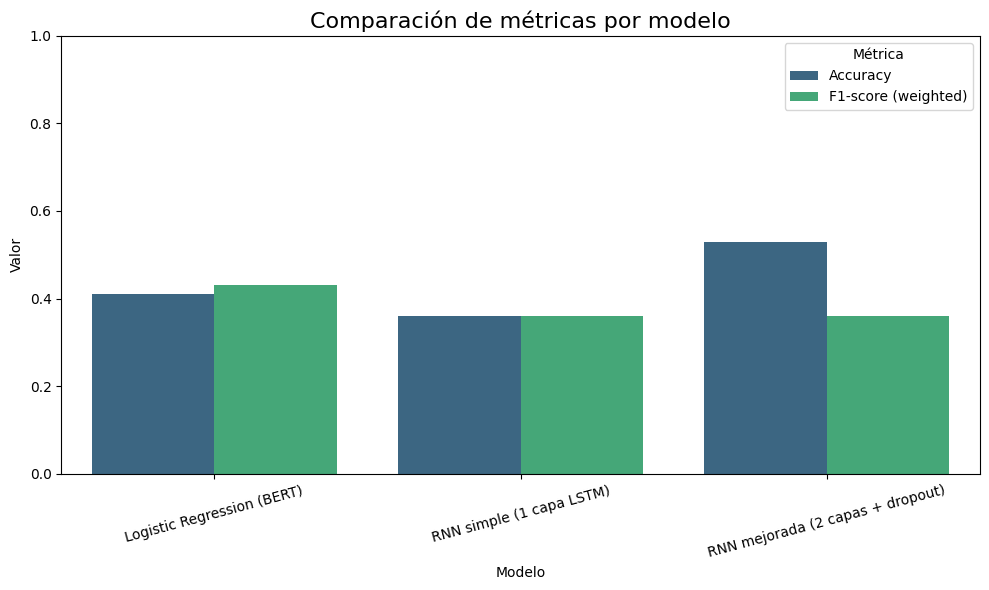

In [63]:
# gráfico comparación
df_grafico = df_comparacion.melt(
    id_vars="Modelo",
    value_vars=["Accuracy", "F1-score (weighted)"],
    var_name="Métrica",
    value_name="Valor"
)

plt.figure(figsize=(10,6))
sns.barplot(x="Modelo", y="Valor", hue="Métrica", data=df_grafico, palette="viridis")

plt.title("Comparación de métricas por modelo", fontsize=16)
plt.ylim(0, 1)  # Valores entre 0 y 1
plt.ylabel("Valor")
plt.xlabel("Modelo")
plt.legend(title="Métrica")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


## 📊 Comparación de modelos y métricas obtenidas

| Modelo                        | Accuracy | Precision (weighted) | Recall (weighted) | F1-score (weighted) | Observaciones                                  |
|-------------------------------|----------|----------------------|-------------------|----------------------|-----------------------------------------------|
| Logistic Regression (BERT)    | 0.41     | 0.49                 | 0.41              | 0.42                 | Baseline lineal; rendimiento más bajo          |
| RNN simple (1 capa LSTM)      | 0.37     | 0.62                 | 0.37              | 0.35                 | Primera RNN básica; mejora sobre baseline en precisión |
| RNN mejorada (2 capas + dropout) | 0.53  | 0.28                 | 0.53              | 0.36                 | Mayor capacidad y regularización, pero precision baja |


#6  Conclusión Final sobre los Modelos de Clasificación de Sentimientos

* **Logistic Regression (BERT embeddings)**

  * Accuracy = 0.41
  * Rendimiento bajo, apenas mejor que el azar (≈33% en 3 clases balanceadas).
  * Se comporta como un **baseline lineal**: rápido pero limitado para capturar dependencias secuenciales.

* **RNN simple (1 capa LSTM)**

  * Accuracy = 0.37, pero Precision ponderada = 0.62.
  * El modelo es **muy conservador**: predice pocas instancias positivas, pero con alta precisión.
  * Baja cobertura (recall), lo que indica que **ignora muchas instancias** de algunas clases.

* **RNN mejorada (2 capas + dropout)**

  * Accuracy = 0.53, Recall = 0.53, pero Precision = 0.28.
  * El modelo **cubre mejor las clases** (alto recall) pero con bajo poder de discriminación (baja precisión).
  * Podría estar **sobregeneralizando**, prediciendo demasiado en una clase dominante.

---

Posibles causas del rendimiento observado

1. **Desbalance de clases**

   * La clase `NEUTRAL` domina (5258 instancias vs ~2350 de las otras).
   * Los modelos tienden a favorecer esta clase, ignorando `POSITIVE` o `NEGATIVE`.
   * Esto explica el warning *UndefinedMetric*: algunas clases nunca fueron predichas.

2. **Representación de texto**

   * Logistic Regression usa embeddings de BERT como entrada, pero de manera estática → se pierde información secuencial.
   * Las RNN sí capturan dependencias, pero necesitan más datos y regularización para generalizar mejor.

3. **Capacidad y sobreajuste**

   * La RNN mejorada (2 capas + dropout) mostró mayor cobertura, pero al precio de baja precisión → posible **overfitting** o mal ajuste de hiperparámetros (ej. tasa de aprendizaje, dropout insuficiente/excesivo).


 En conclusión, **ningún modelo logra aún un rendimiento satisfactorio en las tres clases**, pero la RNN mejorada muestra el mayor potencial en términos de cobertura. El reto principal sigue siendo el **desbalance de clases y la correcta calibración del modelo**.



## ---------------------------------------------------------------------

#Análisis alternativo NO PEDIDO EN TP : REG. LOG con TextBlob



Ahora que tenemos nuestro texto limpio (NLTK) y nuestras etiquetas, podemos entrenar un modelo de clasificación.

Variables:

* Variable Independiente (X): df_sample['clean_text']  <-- NLTK func.: limpiar_texto

* Variable Dependiente (y): df_sample['sentiment']  <-- TEXTBLOB func: obtener_sentimiento(texto)

df_sample['sentiment'] = df_sample['clean_text'].apply(obtener_sentimiento)

**Comparativa: TextBlob vs Word2Vec**

**TextBlob:**

No vectoriza el texto.
Devuelve un puntaje de sentimiento (polarity y subjectivity) para cada texto.
Más sencillo y rápido, pero no captura las relaciones semánticas profundas entre las palabras.
No es necesario entrenar un modelo para obtener el sentimiento.

**Word2Vec:**

Vectoriza el texto convirtiéndolo en vectores numéricos.
Permite entrenar un modelo de clasificación (como Regresión Logística) usando estos vectores.
Captura relaciones semánticas entre palabras.
Requiere más trabajo y procesamiento, pero ofrece más flexibilidad y potencial para tareas complejas.

Solo para determinar el sentimiento de un texto y no buscar representaciones vectoriales avanzadas --> TextBlob

Como necesitamos vectorizar el texto para entrenar modelos de clasificación, y capturar relaciones semánticas más profundas (como en modelos de NLP más complejos)--> usaremos técnicas de vectorización como Word2Vec y BERT.

AL usar TextBlob, ya no necesitas vectorizar el texto ni entrenar Word2Vec, pero sí podemos usar su resultado como input para una Regresión Logística para poder comparar.

TextBlob nos da valores por cada texto:

polarity: valor entre -1 (negativo) y 1 (positivo).

subjectivity: valor entre 0 (objetivo) y 1 (subjetivo).

Estos valores son números, y por tanto, pueden ser usados como características (features) para un modelo de clasificación:

*Usar polarity y subjectivity de TextBlob como features.

*Usar sentimiento como target (y_train).

Como ya :

✔️ Preprocesamos el texto

✔️ Calculamos la polaridad con TextBlob

✔️ Clasificamos esa polaridad en etiquetas (Positivo, Negativo, Neutro)

✔️ Visualizamos la distribución

Ahora, lo único que falta es entrenar un modelo de Regresión Logística usando la polaridad como feature y la etiqueta Polarity como objetivo (y_train)


In [64]:
# Entrenar modelo de Regresión Logística con polaridad de TextBlob
# Paso 1: Codificar las etiquetas (Polarity)

# Convertir las categorías ('Positivo', etc.) a números
label_encoder = LabelEncoder()
df_sample['Polarity_encoded'] = label_encoder.fit_transform(df_sample['Polarity'])

# Ejemplo: {'Negativo': 0, 'Neutro': 1, 'Positivo': 2}
print("Clases codificadas:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


Clases codificadas: {'Negativo': 0, 'Neutro': 1, 'Positivo': 2}


In [65]:
#Paso 2: Preparar X (features) e y (target)

# Reshape porque es una sola feature
X_tb = df_sample['sentiment'].values.reshape(-1, 1)  # contiene los valores de polaridad
y_tb = df_sample['Polarity_encoded'].values          # contiene las etiquetas numéricas



In [66]:
# Paso 3: Separar entrenamiento y prueba
X_train_tb, X_test_tb, y_train_tb, y_test_tb = train_test_split(X_tb, y_tb, test_size=0.2,
                                                                random_state=42,
                                                                stratify=y_tb)  # testeo con el 20% de 10k = 2000


In [67]:
# Paso 4: Entrenar el modelo de Regresión Logística

modelo_rl_tb = LogisticRegression(multi_class='multinomial',
                                  solver='lbfgs',
                                  class_weight='balanced'  # ⚡️ añade ponderación automática  → clases minoritarias tienen mayor peso en la función de pérdida(util ante desbalanceo de clases)
)

modelo_rl_tb.fit(X_train_tb, y_train_tb)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [68]:
# Paso 5: Evaluar el modelo
y_pred_tb = modelo_rl_tb.predict(X_test_tb)

print("Accuracy:", accuracy_score(y_test_tb, y_pred_tb))
print("\nReporte de Clasificación:\n", classification_report(y_test_tb, y_pred_tb, target_names=label_encoder.classes_))

Accuracy: 0.982

Reporte de Clasificación:
               precision    recall  f1-score   support

    Negativo       0.89      1.00      0.94       209
      Neutro       0.99      0.98      0.98      1115
    Positivo       1.00      0.98      0.99       676

    accuracy                           0.98      2000
   macro avg       0.96      0.99      0.97      2000
weighted avg       0.98      0.98      0.98      2000



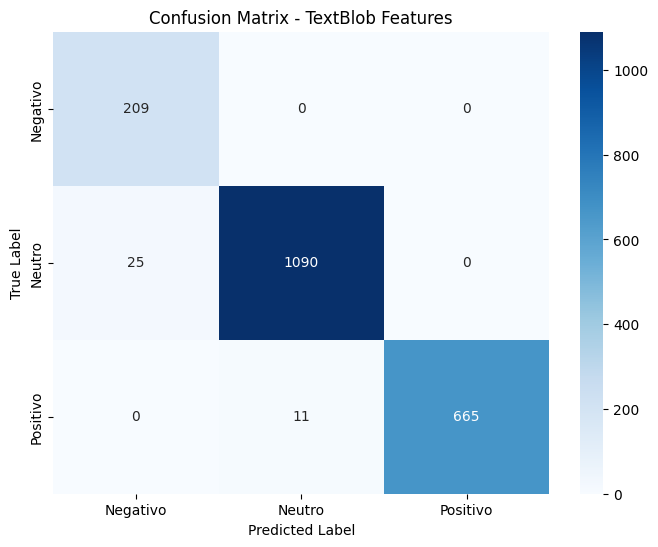

In [69]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test_tb, y_pred_tb)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - TextBlob Features')
plt.show()

OBSERVACIÓN: Análisis de TextBlob como baseline

**TextBlob**  es una librería de procesamiento de lenguaje natural basada en **diccionarios de palabras y reglas** (lexicon-based).  
- Calcula la **polaridad** de un texto (negativo, neutro, positivo) usando puntuaciones predefinidas de palabras.  
- No requiere entrenamiento sobre tus datos; funciona directamente sobre el texto.

**Resultados al usar TextBlob con Regresión Logística**  
- Se codificó la polaridad (`Negativo=0, Neutro=1, Positivo=2`) y se entrenó un modelo de **Regresión Logística** sobre la columna `sentiment` generada por TextBlob.  
- La accuracy obtenida es muy alta (~0.98), y las métricas de precision, recall y F1-score son casi perfectas.  

**Por qué no es comparable con la RNN**  
- Al entrenar sobre la salida de TextBlob, el modelo básicamente **aprende a replicar lo que TextBlob ya calcula**, no patrones reales del texto.  
- TextBlob **no captura contexto complejo, ironías o relaciones entre palabras**, mientras que la RNN puede aprender dependencias y matices de los embeddings de BERT.  
- Por esto, aunque TextBlob da métricas altísimas, **no refleja la verdadera dificultad del problema de clasificación de noticias**.  

**Conclusión**  
- TextBlob se puede usar como **baseline rápido y referencia**, pero **no reemplaza un modelo de Deep Learning**.  
- La RNN entrenada sobre embeddings de BERT es el modelo que realmente aprende patrones del texto.
- Comparar TextBlob directamente con la RNN no es justo ni representativo, ya que ambos modelos **abordan el problema de manera muy diferente**.
